<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:

with open('sat_scores.csv') as csv_file:
    sat_dict={}
    column_dict={}
    csv_reader=csv.reader(csv_file,delimiter=",")
    for index_file,row in enumerate(csv_reader):
        if index_file==0: #header
            for index,column_name in enumerate(row):
                sat_dict[column_name]=[] #initialize key of sat dict
                column_dict[index]=column_name
        else:
            for i,value in enumerate(row):
                sat_dict[column_dict[i]].append(value)

print(sat_dict)
        

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
#make pandas Data Frame object with SAT dict
df_sat_dict=pd.DataFrame.from_dict(sat_dict)
df_sat_dict.head()
df_sat_dict.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [4]:
#make pandas Data Frame with .read_csv()
df_sat_scores=pd.read_csv('sat_scores.csv')
df_sat_scores.head()
df_sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

comparison between data frame loading from file and inputting this dictionary <br>
SAT DICT of rate, state,and verbal are object, whereas pd.read_csv of rate,state, verbal are integers

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
df_sat_scores.head(10)
#State is string
#Rate, verbal, math are integers

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
df_sat_scores.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
data_dict={
            'columns':df_sat_scores.columns,
            'type':df_sat_scores.dtypes,
            'description': df_sat_scores.describe(),
            'shape':df_sat_scores.shape
        }
print(data_dict)

{'columns': Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object'), 'type': State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object, 'description':             Rate      Verbal        Math
count  52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000
std    27.301788   33.236225   36.014975
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  504.000000
50%    33.500000  526.500000  521.000000
75%    63.500000  562.000000  555.750000
max    82.000000  593.000000  603.000000, 'shape': (52, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

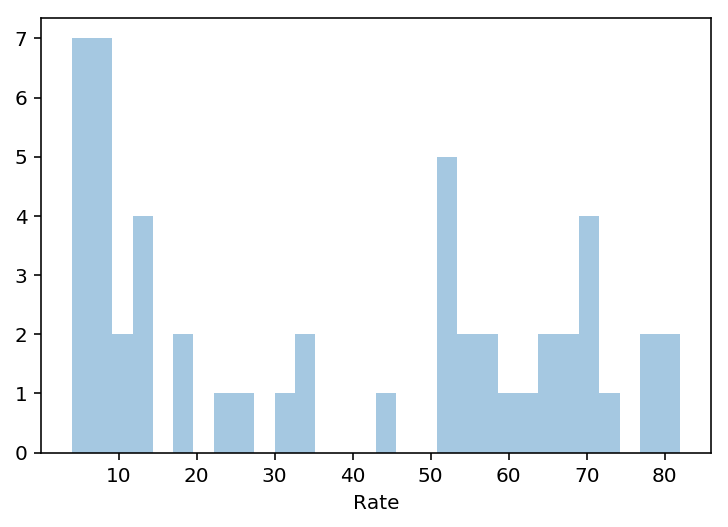

In [8]:
import seaborn as sns
#for column in ['Rate','Math','Verbal']:
sns.distplot(df_sat_scores.Rate,kde=False,bins=30,label='Rate')

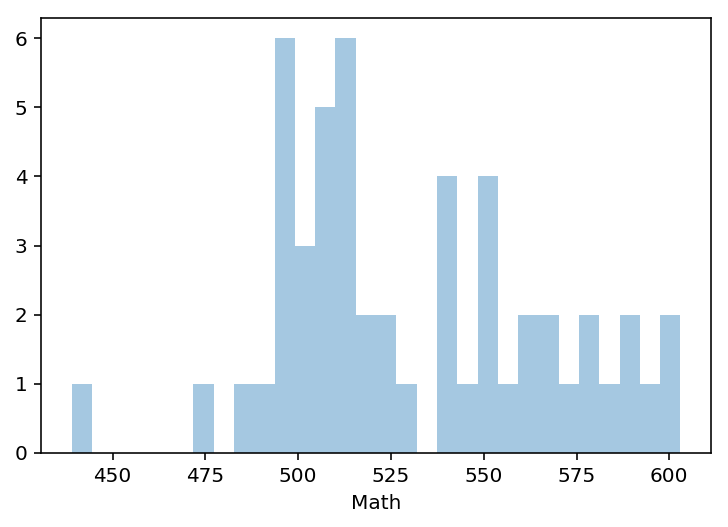

In [9]:
sns.distplot(df_sat_scores.Math,kde=False,bins=30,label='Math')

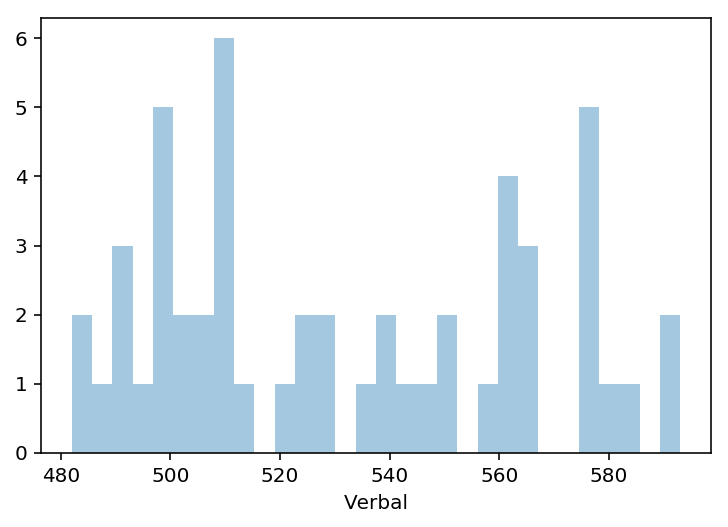

In [10]:
sns.distplot(df_sat_scores.Verbal,kde=False,bins=30,label='Verbal')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

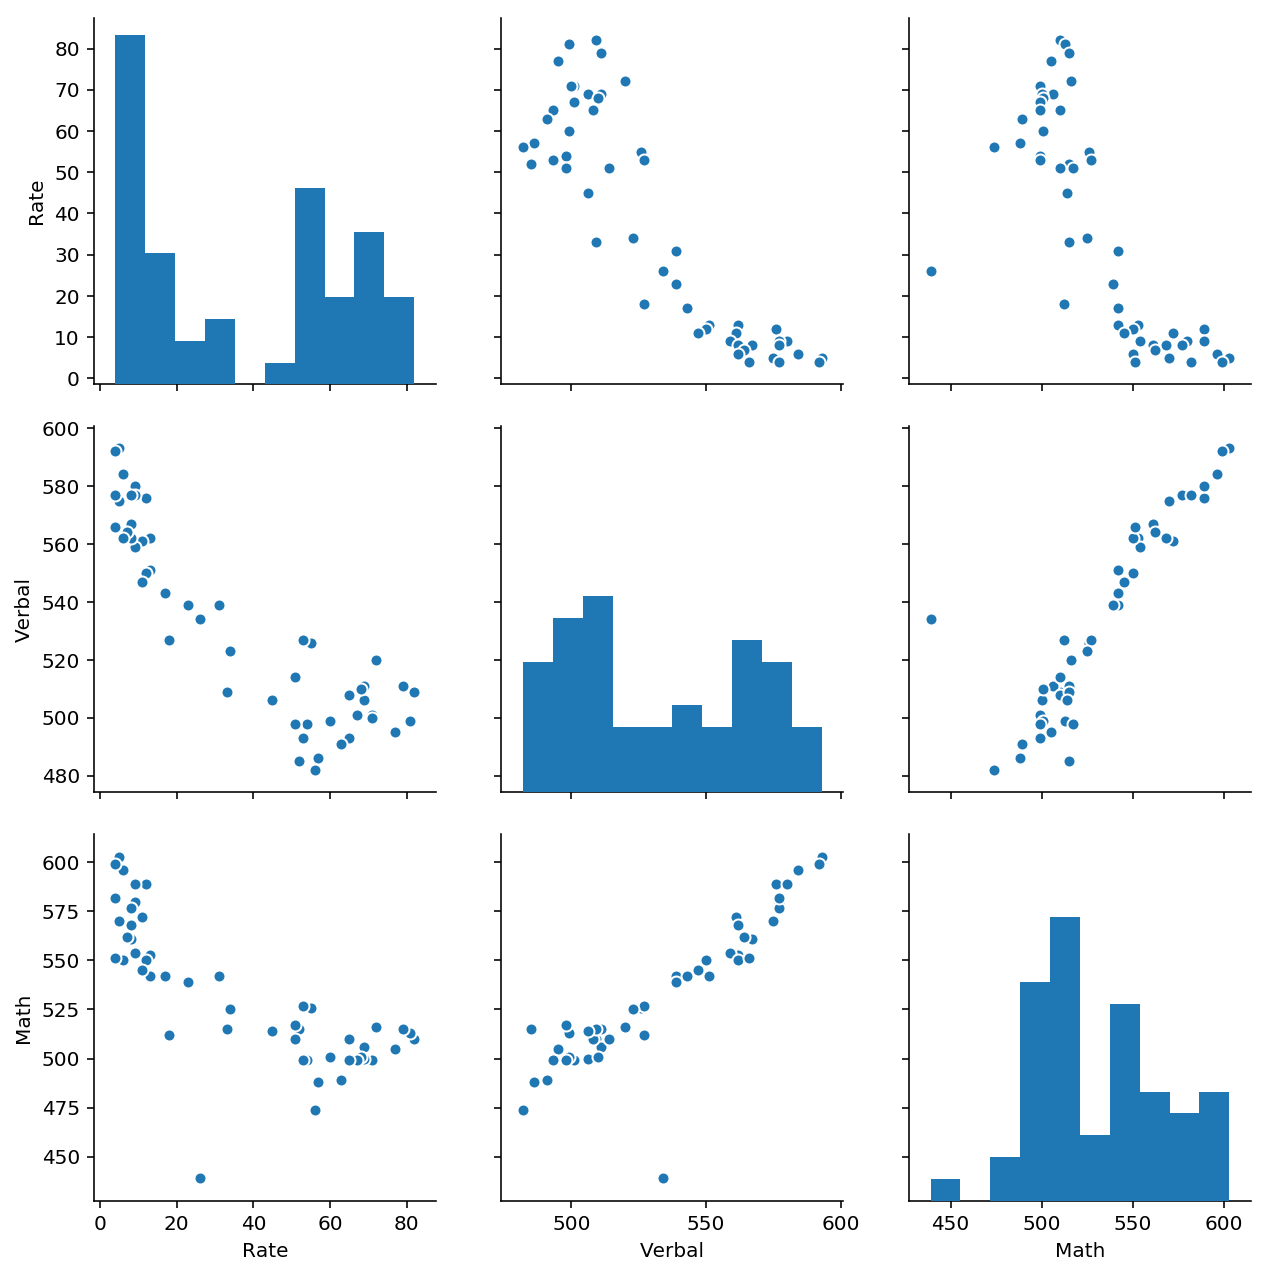

In [11]:
sns.pairplot(df_sat_scores,size=3)

From the plot above, we can see that the rate and verbal are negatively correlated whereas math and verbal are positively correlated <br>




<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

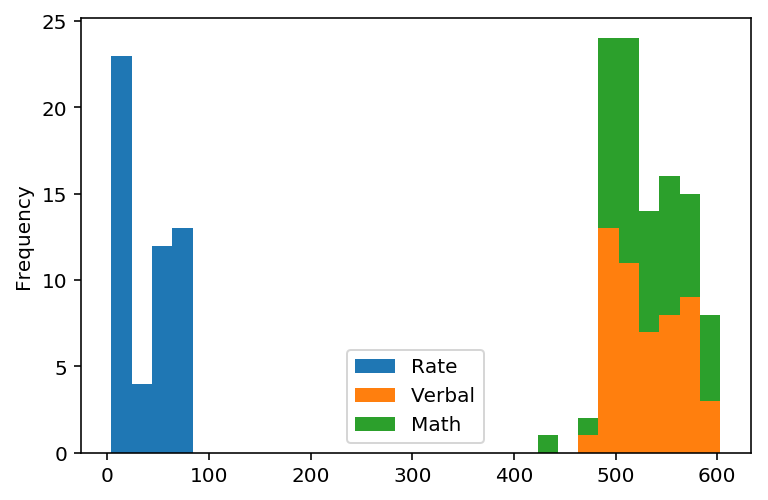

In [12]:
df_sat_scores.plot.hist(['Verbal','Math'],stacked=True,bins=30)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

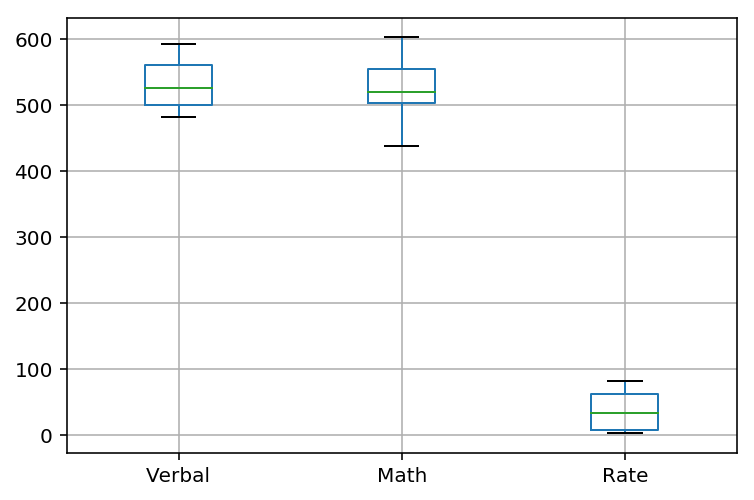

In [13]:
df_sat_scores.boxplot(['Verbal','Math','Rate'])
#benefit , boxplot showing the median, percentile information
#The data range of Rate (0-100) is different with data range of Verbal and Math (400-600). 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


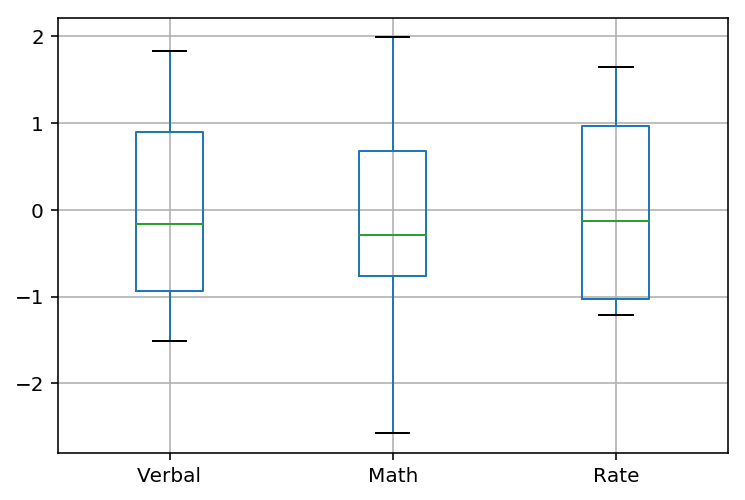

In [14]:
df_sat_scores_norm=pd.DataFrame()
df_sat_scores_norm['Verbal']=(df_sat_scores['Verbal']-df_sat_scores['Verbal'].mean())/df_sat_scores['Verbal'].std()
df_sat_scores_norm['Math']=(df_sat_scores['Math']-df_sat_scores['Math'].mean())/df_sat_scores['Math'].std()
df_sat_scores_norm['Rate']=(df_sat_scores['Rate']-df_sat_scores['Rate'].mean())/df_sat_scores['Rate'].std()
df_sat_scores_norm.boxplot(['Verbal','Math','Rate'])

# normalized the verbal,math & rate data with equation: x-mean/std

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [15]:
df_sat_scores[df_sat_scores['Verbal']>df_sat_scores.Verbal.mean()]['Verbal'].count()
#24 out of 52 states have verbal score greater than mean of verbal
#df_sat_scores['Verbal'].count() #total count=52

24

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [16]:
df_sat_scores[df_sat_scores['Verbal']>df_sat_scores.Verbal.median()]['Verbal'].count()
#26 out of 52 states have verbal score greater than median of verbal
#negative-skew distribution for verbal as mean<median

26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
df_sat_scores['Diff']=df_sat_scores['Verbal']-df_sat_scores['Math']
df_sat_scores.head()

,State,Rate,Verbal,Math,Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
df1=df_sat_scores[df_sat_scores['Diff']>0].sort_values('Diff',ascending=False).head(10)
df1.head(3)

,State,Rate,Verbal,Math,Diff
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [19]:
df2=df_sat_scores[df_sat_scores['Diff']<0].sort_values('Diff',ascending=True).head(10)
df2.head(3)

,State,Rate,Verbal,Math,Diff
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [20]:
df_sat_scores.corr()

,Rate,Verbal,Math,Diff
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Diff,-0.101412,0.052600,-0.388219,1.000000


from the above table, math and rate are negatively correlated, as well as verbal and rate <br>
whereas math and verbal are positively correlated. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [21]:
df_sat_scores.describe()
#count= Total number of rows
#mean= Average
#std = standard deviation
#min = minimum
# 25% = 25% of the data
# 50% = median of the data
# 75% = 75% of the data
#max = max value


,Rate,Verbal,Math,Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [22]:
np.cov(df_sat_scores[['Verbal','Math','Rate']])
# covariance : when variable change together
# corraltion: how variable correlate
# Covariance to correlation = covariance/std(x)(y)
#correlatin matrix has range -1,0,1

array([[ 60919.        ,  60566.        ,  61846.        , ...,
         84290.5       ,  79012.5       ,  66264.5       ],
       [ 60566.        ,  60257.33333333,  61497.33333333, ...,
         83820.33333333,  78501.66666667,  65903.        ],
       [ 61846.        ,  61497.33333333,  62789.33333333, ...,
         85577.33333333,  80202.66666667,  67278.        ],
       ...,
       [ 84290.5       ,  83820.33333333,  85577.33333333, ...,
        116636.33333333, 109302.66666667,  91696.5       ],
       [ 79012.5       ,  78501.66666667,  80202.66666667, ...,
        109302.66666667, 102546.33333333,  85917.5       ],
       [ 66264.5       ,  65903.        ,  67278.        , ...,
         91696.5       ,  85917.5       ,  72091.        ]])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [23]:
drugs=pd.read_csv('drug-use-by-age.csv')
drugs.head(2)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0


In [24]:
drugs.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0


In [25]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [26]:
#further investigate for those variable type object
print(drugs['cocaine-frequency'].unique())
print(drugs['crack-frequency'].unique())
print(drugs['heroin-frequency'].unique())
print(drugs['inhalant-frequency'].unique())
print(drugs['oxycontin-frequency'].unique())
print(drugs['meth-frequency'].unique())

['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']
['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0'
 '48.0' '62.0']
['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0']
['19.0' '12.0' '5.0' '5.5' '3.0' '4.0' '2.0' '3.5' '10.0' '13.5' '-']
['24.5' '41.0' '4.5' '3.0' '4.0' '6.0' '7.0' '7.5' '12.0' '13.5' '17.5'
 '20.0' '46.0' '5.0' '-']
['-' '5.0' '24.0' '10.5' '36.0' '48.0' '12.0' '105.0' '2.0' '46.0' '21.0'
 '30.0' '54.0' '104.0']


In [27]:
#replacing all "-" values with NAN

def f(x):
    if type(x)==str:
        if x == '-':
            return np.NAN
        else:
            return x
    else:
        return x
    

drugs=drugs.applymap(f)

#convert datatype to numeric
drugs.iloc[:,1:]=drugs.iloc[:,1:].apply(pd.to_numeric)

drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

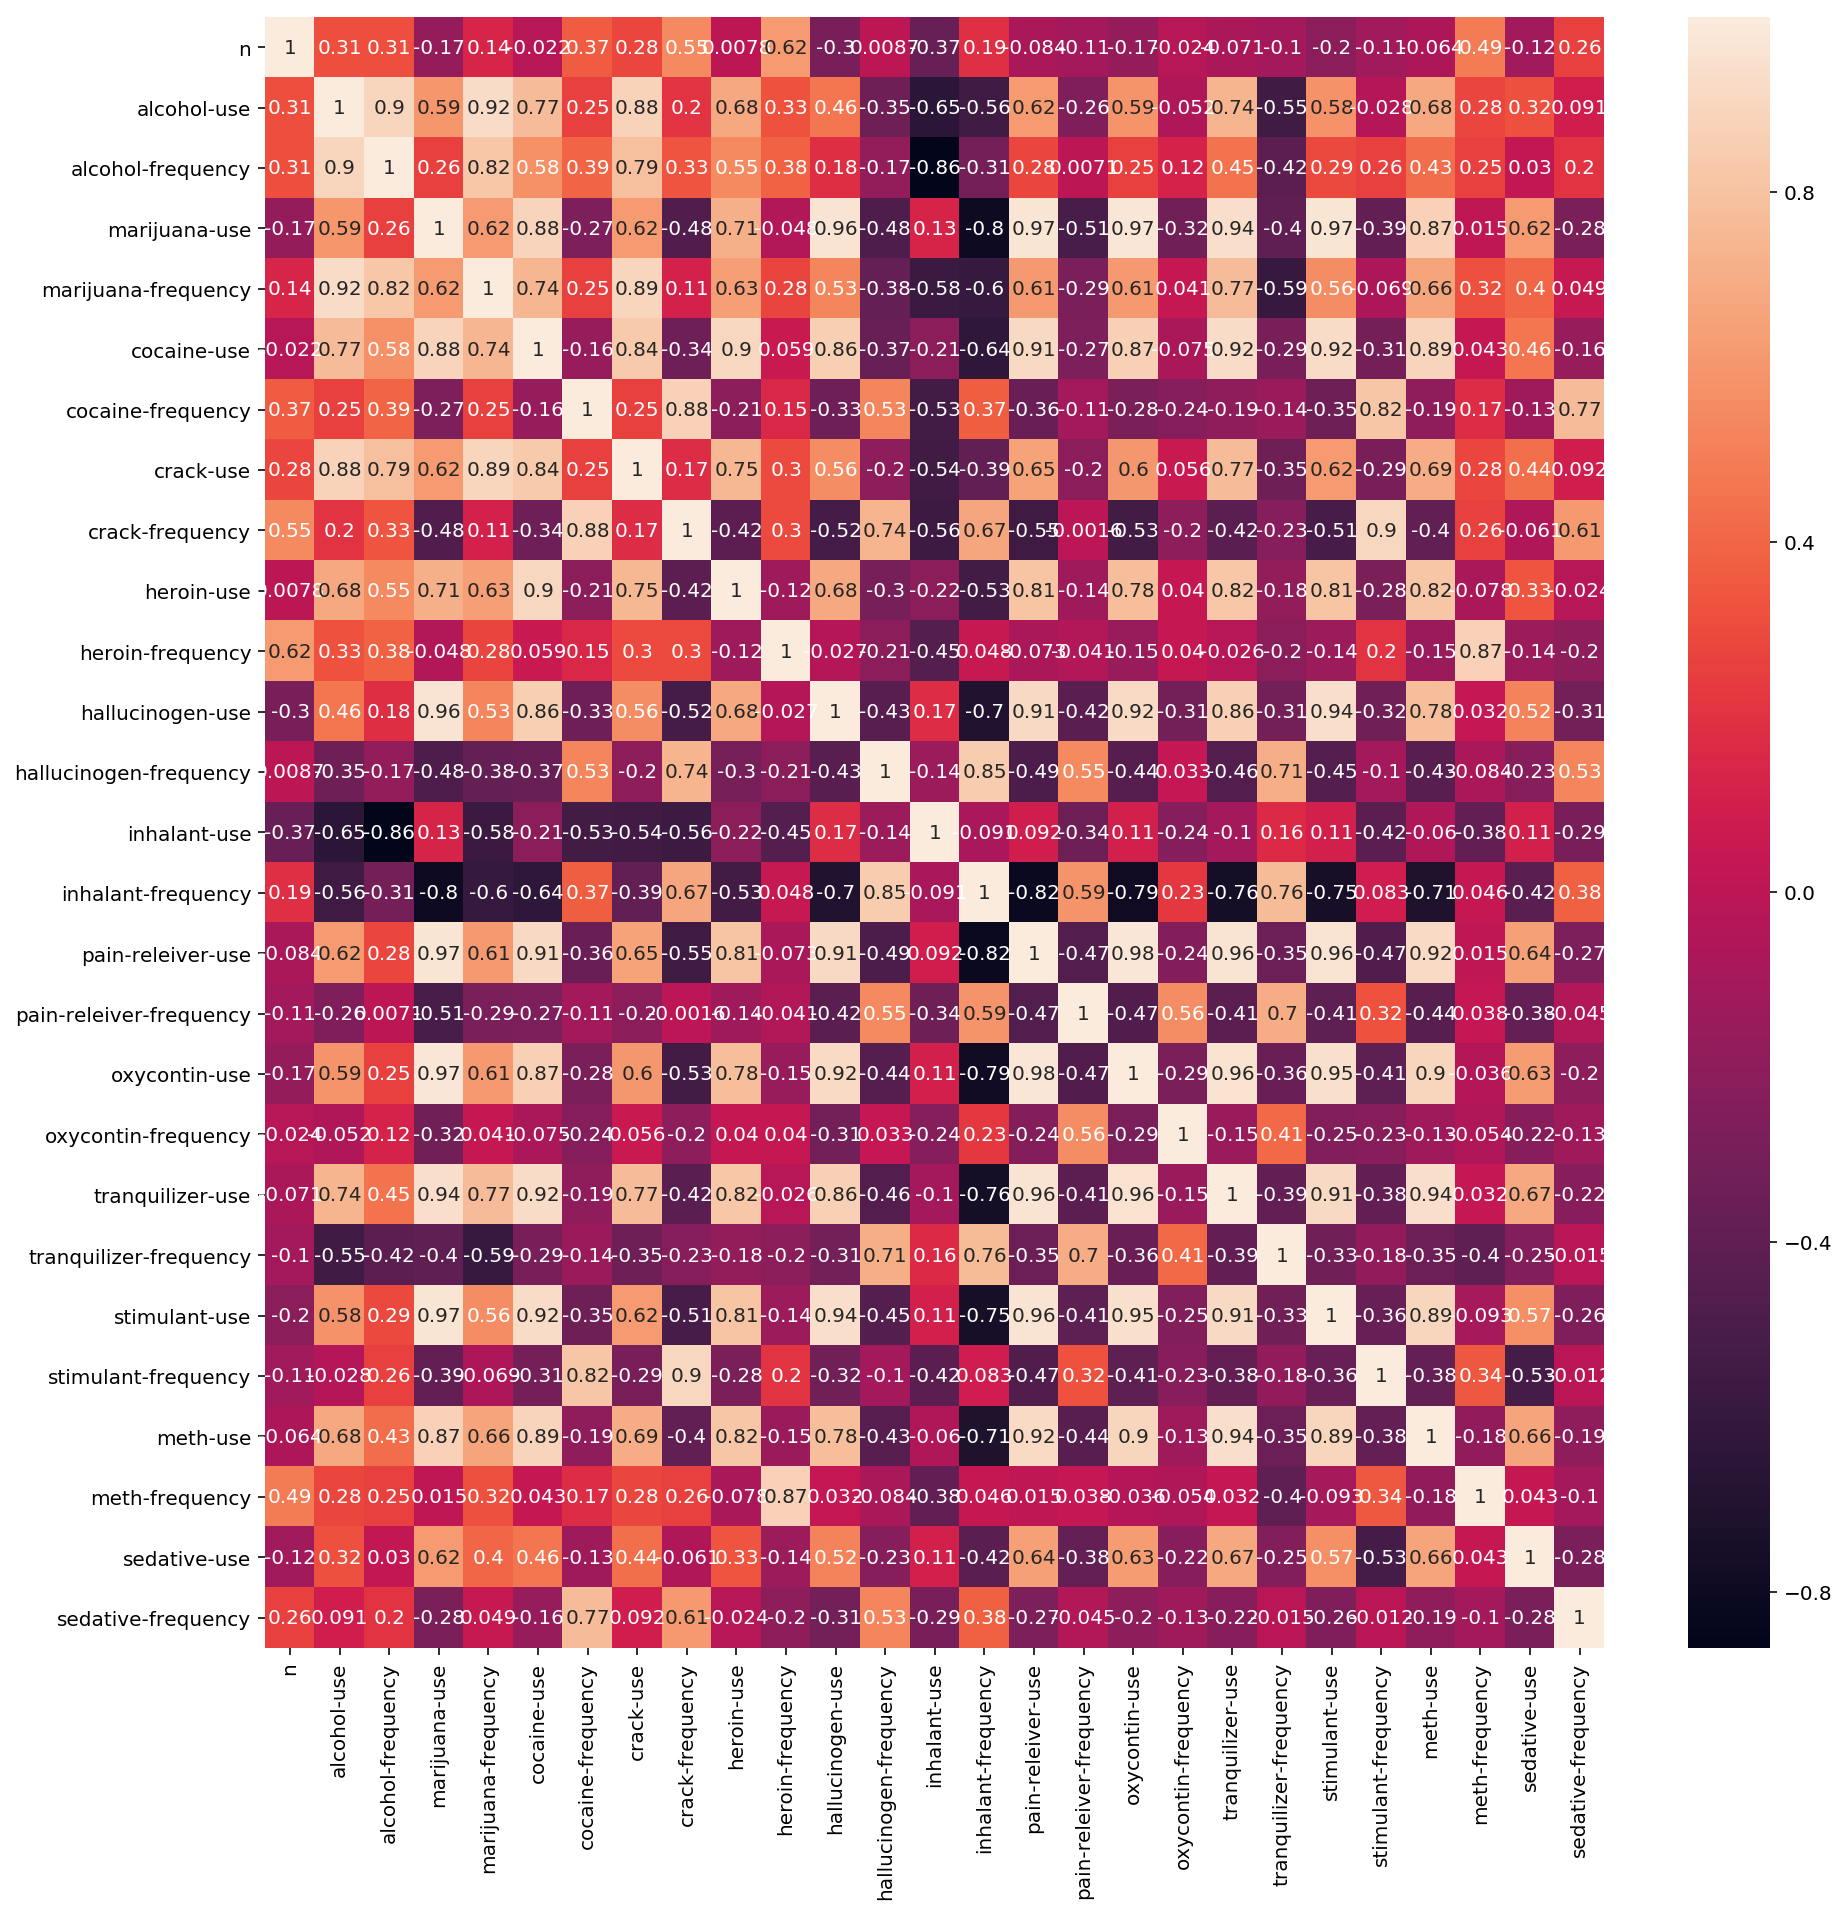

In [28]:
#checking for correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(drugs.corr(),annot=True)

In [29]:
correlation = drugs[['alcohol-use', 'alcohol-frequency', 'marijuana-use', 'marijuana-frequency', 
             'cocaine-use', 'cocaine-frequency', 'crack-use', 'crack-frequency', 'heroin-use', 'heroin-frequency', 
             'hallucinogen-use', 'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency', 'pain-releiver-use', 
             'pain-releiver-frequency', 'oxycontin-use', 'oxycontin-frequency', 
             'tranquilizer-use', 'tranquilizer-frequency', 'stimulant-use', 'stimulant-frequency', 
             'meth-use', 'meth-frequency', 'sedative-use', 'sedative-frequency']]
correlation = correlation.corr()
correlation

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
alcohol-use,1.000000,0.897889,0.594165,0.920425,0.773458,0.254042,0.877378,0.202732,0.677614,0.327330,...,0.589219,-0.052126,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.282820,0.318268,0.091251
alcohol-frequency,0.897889,1.000000,0.260219,0.818769,0.577601,0.391981,0.785050,0.333935,0.546194,0.381874,...,0.251554,0.119852,0.448543,-0.415026,0.291766,0.260304,0.425153,0.253725,0.029867,0.201423
marijuana-use,0.594165,0.260219,1.000000,0.615610,0.883789,-0.273950,0.620670,-0.476095,0.711613,-0.047566,...,0.971733,-0.323519,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.014585,0.616766,-0.277144
marijuana-frequency,0.920425,0.818769,0.615610,1.000000,0.742598,0.250348,0.892077,0.113860,0.631789,0.277175,...,0.609618,0.040880,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.317099,0.399124,0.048777
cocaine-use,0.773458,0.577601,0.883789,0.742598,1.000000,-0.163922,0.835727,-0.339153,0.899944,0.058679,...,0.865626,-0.075193,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.043154,0.461914,-0.159997
cocaine-frequency,0.254042,0.391981,-0.273950,0.250348,-0.163922,1.000000,0.250877,0.875558,-0.206298,0.149018,...,-0.276995,-0.236768,-0.191929,-0.144951,-0.345279,0.817772,-0.189141,0.172758,-0.126690,0.773808
crack-use,0.877378,0.785050,0.620670,0.892077,0.835727,0.250877,1.000000,0.173208,0.750790,0.299661,...,0.603003,0.056195,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.281240,0.438421,0.091676
crack-frequency,0.202732,0.333935,-0.476095,0.113860,-0.339153,0.875558,0.173208,1.000000,-0.417148,0.298192,...,-0.529659,-0.195650,-0.420309,-0.233501,-0.511014,0.903993,-0.395273,0.261224,-0.060603,0.611218
heroin-use,0.677614,0.546194,0.711613,0.631789,0.899944,-0.206298,0.750790,-0.417148,1.000000,-0.121704,...,0.775321,0.039657,0.818583,-0.175464,0.808024,-0.277996,0.816620,-0.078088,0.333649,-0.023708
heroin-frequency,0.327330,0.381874,-0.047566,0.277175,0.058679,0.149018,0.299661,0.298192,-0.121704,1.000000,...,-0.152658,0.039502,-0.025554,-0.202417,-0.136570,0.204941,-0.145718,0.873618,-0.139270,-0.199142


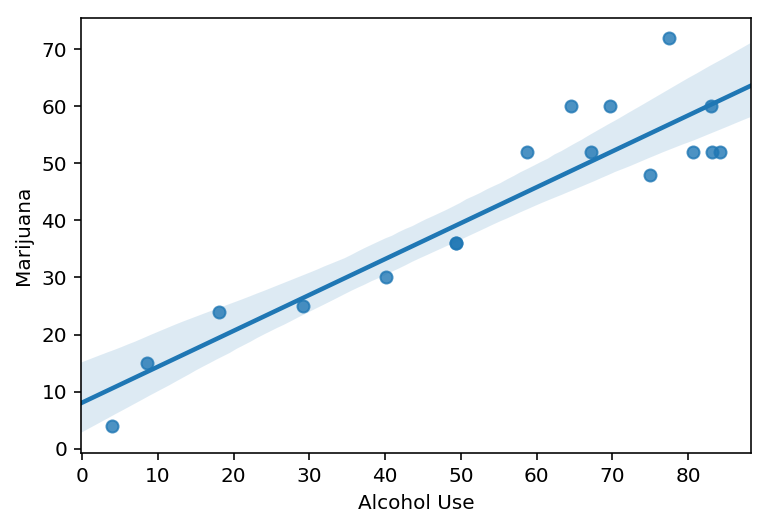

In [30]:
x, y = pd.Series(drugs['alcohol-use'], name="Alcohol Use"), pd.Series(drugs['marijuana-frequency'], name="Marijuana")
ax = sns.regplot(x=x, y=y, marker="o")
# positive correlation,0.92

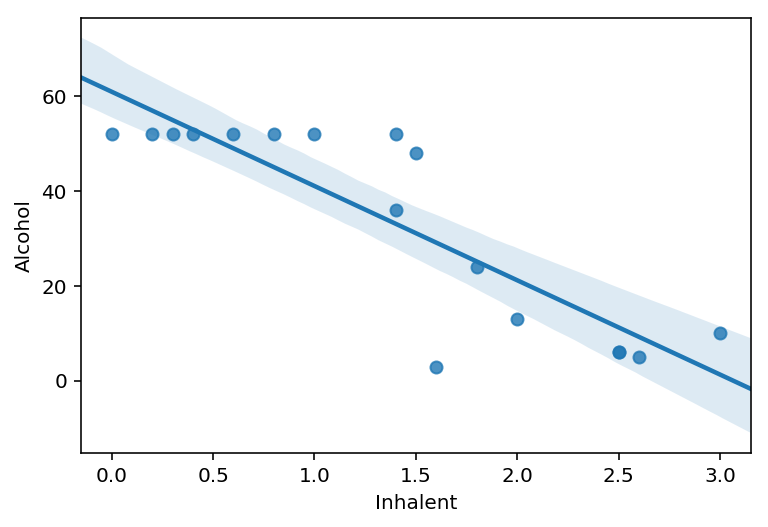

In [31]:
x, y = pd.Series(drugs['inhalant-use'], name="Inhalent"), pd.Series(drugs['alcohol-frequency'], name="Alcohol")
ax = sns.regplot(x=x, y=y, marker="o")
#negative correlation, -0.65

In [32]:
#getting data use columns
drugs_use = drugs.iloc[:,2:28:2]
drugs_use['age'] = drugs['age']
drugs_use = drugs_use.set_index('age')
drugs_use.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age,,,,,,,,,,,,,
12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


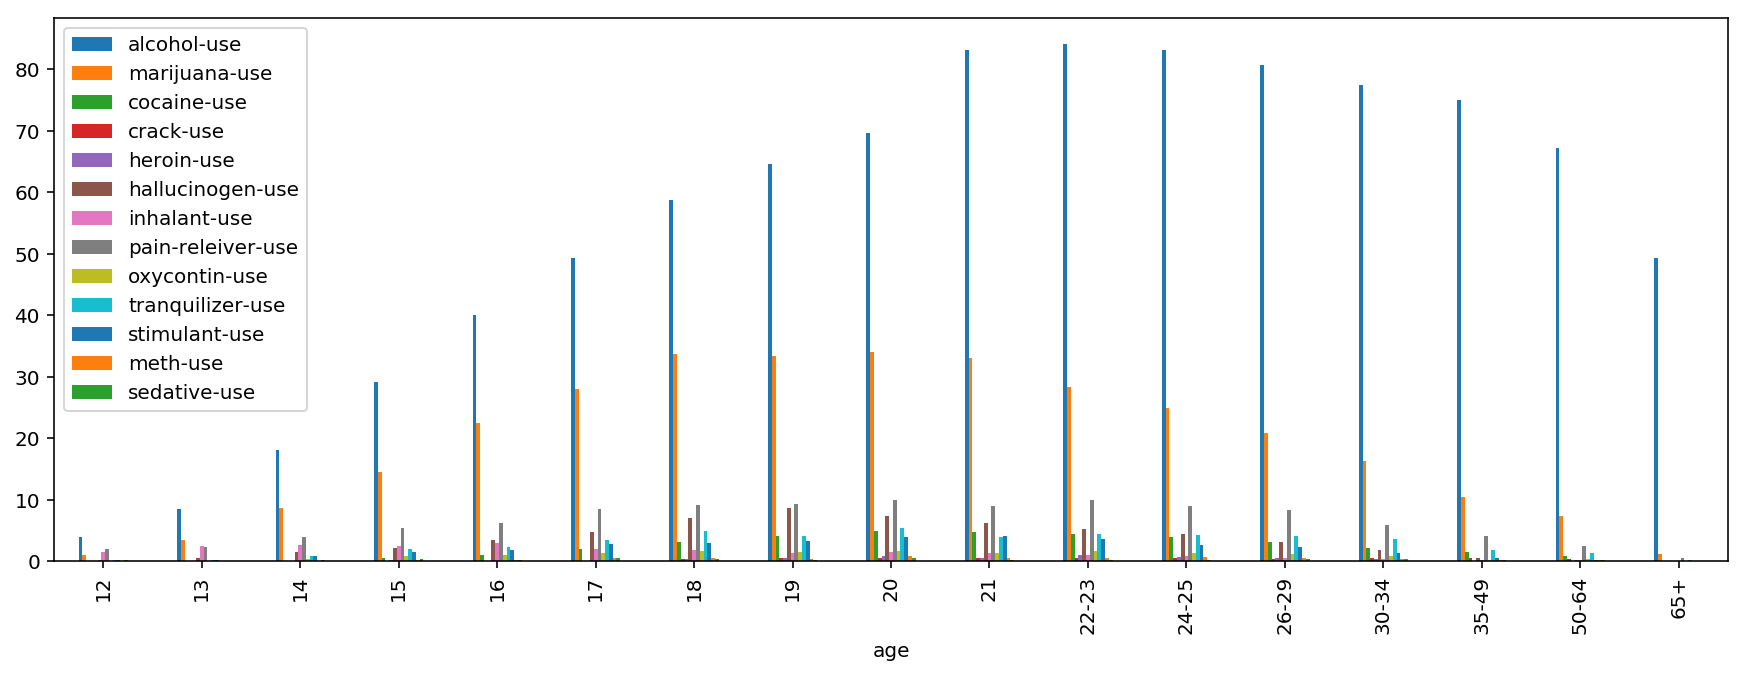

In [33]:
#plotting bar chart
drugs_use.plot(kind = 'bar', figsize = (15,5))

#from plot below, can see that the age22-23 has highest alcohol use

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [34]:
# Code
# Hypothesis Question:means difference between 'alcohol-use' and 'marijuana-use' is zero 
#difference group of means
import numpy as np
alcohol_use_mean=np.mean(drugs['alcohol-use'])
marijuana_use_mean=np.mean(drugs['marijuana-use'])
mean_difference=alcohol_use_mean-marijuana_use_mean
if mean_difference > 0:
    print("means difference between 'alcohol-use' and 'control-group' is not zero:{}".format(mean_difference))
else:
    print("means difference between 'alcohol-use' and 'control-group' is zero")

means difference between 'alcohol-use' and 'control-group' is not zero:36.50588235294118


In [35]:
#using t-test formula
import scipy.stats as stats

stats.ttest_ind(drugs['alcohol-use'],drugs['marijuana-use'])

#pvalue is greater than 0.05, therefore we can say that 'alcohol-use' and 'marijuana-use' are from different populations.


Ttest_indResult(statistic=5.116246810580653, pvalue=1.4171567091021532e-05)

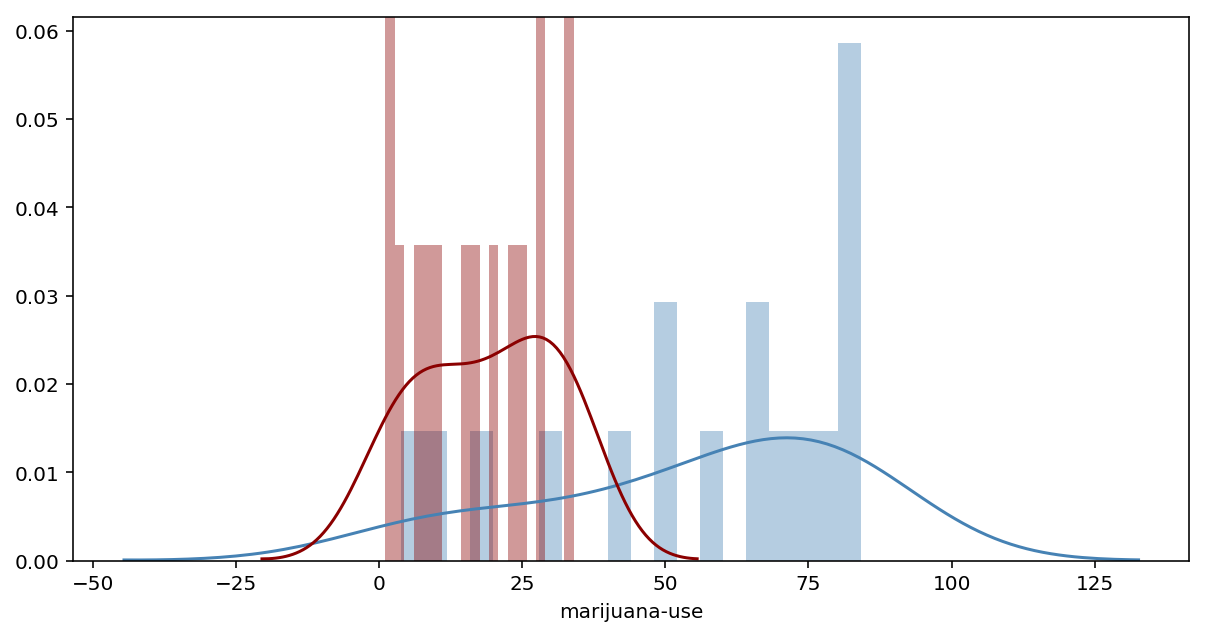

In [36]:
#creating histogram
fig = plt.figure(figsize=(10,5))

# Get the current axis out of the figure.
ax = fig.gca()

# Create a distribution plot with `seaborn`'s `.distplot()` function, passing in and then returning the axis.
# First, plot group one:
ax = sns.distplot(drugs['alcohol-use'], bins=20, color='steelblue', ax=ax)

# Create another distribution on the same axis for group two:
sns.distplot(drugs['marijuana-use'], bins=20, color='darkred', ax=ax)

In [37]:
#correlation between  'alcohol-use' and 'marijuana-use'
import scipy.stats as stats

drugs['alcohol-use'].corr(drugs['marijuana-use'])
#there is a strong correlation between drugs['alcohol-use'] and drugs['marijuana-use'] is 0.59

0.5941650600365183

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [38]:
rate = df_sat_scores.Rate
rate.describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

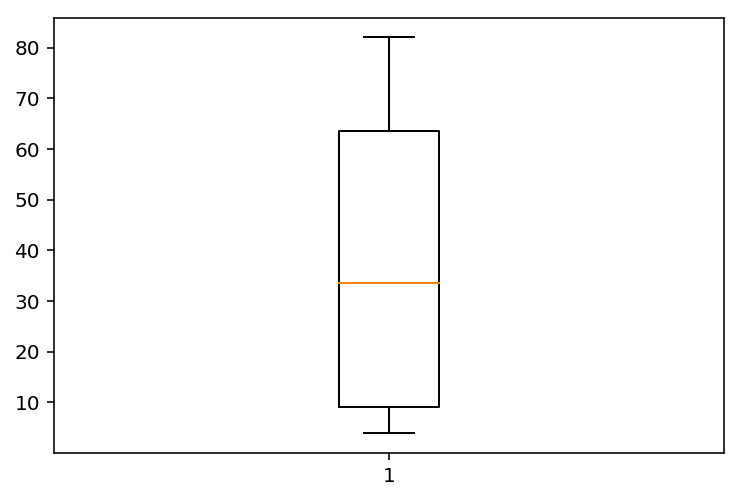

In [39]:
plt.boxplot(rate)
plt.show()
#found no outliers outside of the range.


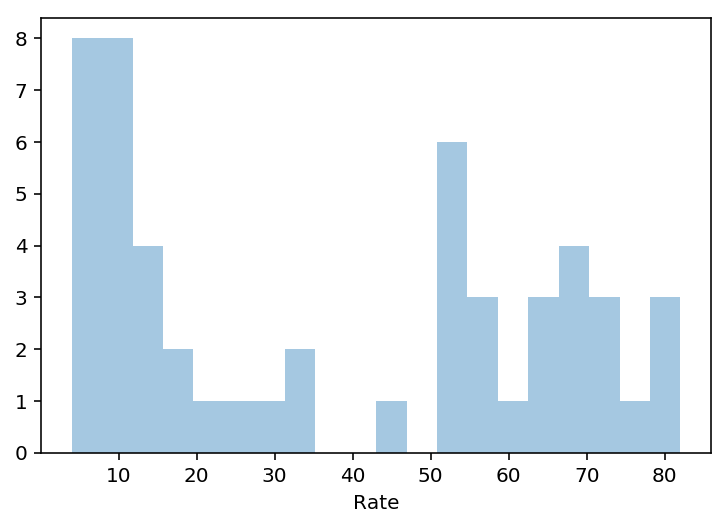

In [40]:
sns.distplot(rate, kde=False, bins=20)

In [41]:
df_sub  = df_sat_scores.loc[0:, ['Verbal', 'Math', 'Rate']]
math_out = np.mean(df_sub['Math']) + (np.std(df_sub['Math']) * 3)
verb_out = np.mean(df_sub['Verbal']) + (np.std(df_sub['Verbal']) * 3)
math_low = np.mean(df_sub['Math']) - (np.std(df_sub['Math']) * 3)
verb_low = np.mean(df_sub['Verbal']) - (np.std(df_sub['Verbal']) * 3)

i = 0
while i < len(df_sub):
    if df_sub['Math'][i] > math_out or df_sub['Math'][i] < math_low:
        print ("Outlier for Math",df_sub['Math'][i])
    else:
        pass
    if df_sub['Verbal'][i] > verb_out or df_sub['Verbal'][i] < verb_low:
        print ("Outlier for Verbal",df_sub['Verbal'][i])
    else:
        pass
    i += 1

#no outliers in verbal and math mean, median, and std

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [42]:
import scipy 
print(scipy.stats.stats.spearmanr(df_sat_scores[['Verbal']], df_sat_scores[['Math']])[0])

0.9052048847940284


Spearman correlation= monotinic relationship <br>
Pearson correlation= for linear relationship<br>
It is calculated from evaluating the correlation of the ranked values for each variable within its own dataset and evaluates how the percentile scoring changes relative to each other

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [43]:
from scipy import stats
df_sat_scores['Rate_percentile'] = [stats.percentileofscore(df_sat_scores['Rate'], a) for a in df_sat_scores['Rate']]
df_sat_scores[df_sat_scores['State'] == "CA"]

#The percentile is the factor used to calculate correlation between two variables in the spearman rank correlation.

,State,Rate,Verbal,Math,Diff,Rate_percentile
23,CA,51,498,517,-19,56.730769


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

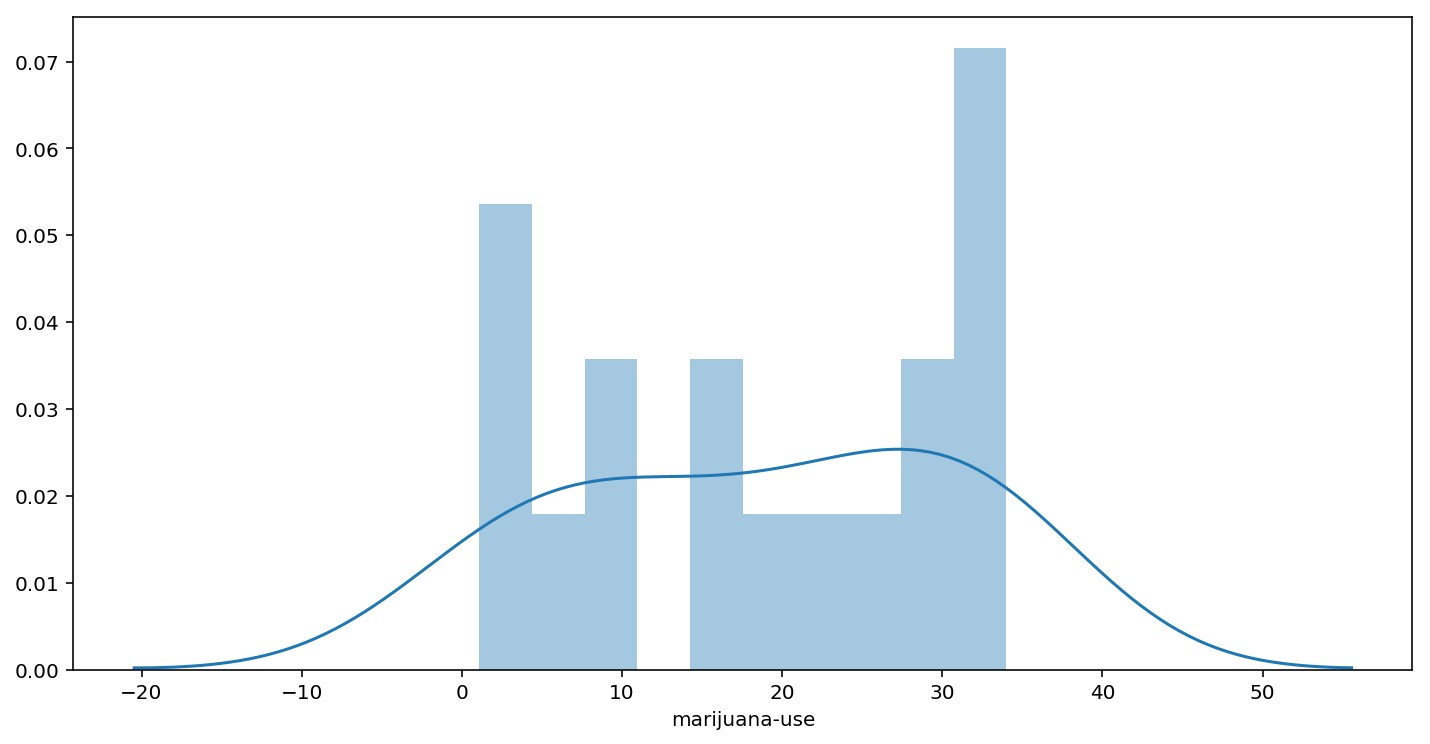

In [44]:
plt.figure(figsize=(12,6))
sns.distplot(drugs['marijuana-use'], bins=10, kde=True)

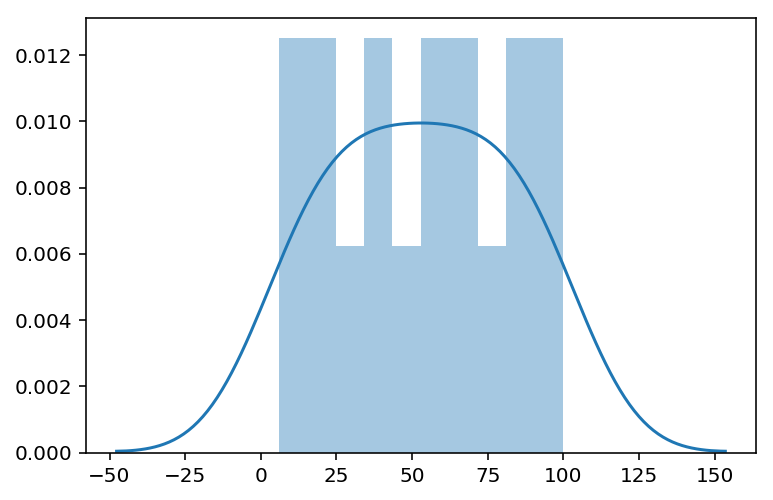

In [45]:
marijuana_percentile = [stats.percentileofscore(drugs['marijuana-use'], a) for a in drugs['marijuana-use']]
sns.distplot(marijuana_percentile, bins=10, kde= True)